In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

root = '..'
lstm_comp_res = f'{root}/storage/skom/comparison/2021-07-19-14-56'
tcn_comp_res = f'{root}/storage/skom/comparison/2021-07-20-13-29'

pd.set_option('display.max_rows', 200)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray', labelsize=20)
plt.rc('ytick', direction='out', color='gray', labelsize=20)
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## LSTM

In [92]:
lstmdf = pd.read_csv(f'{lstm_comp_res}/lstm_comparison.csv')
lstmdf = lstmdf.drop(columns=['Unnamed: 0'])
lstmdf = lstmdf.iloc[1:]

In [93]:
lstmdf

,lowest_valid_mae,features,params_in_network,trainable_params_in_network,linear_size,hidden_size,sequence_length
1,0.309064,"['production', 'speed']",13765,13765,64,48,5
2,0.301844,"['production', 'speed', 'direction', 'temporal']",23365,23365,64,64,5
3,0.303366,"['production', 'speed', 'direction']",8261,8261,64,32,13
4,0.300114,"['production', 'speed', 'direction', 'temporal']",19205,19205,128,48,13
5,0.300985,"['production', 'speed', 'direction', 'temporal']",28805,28805,128,64,13
6,0.300927,"['production', 'speed', 'direction']",11653,11653,128,32,29
7,0.310120,"['production', 'speed']",7365,7365,64,32,5
8,0.300702,"['production', 'speed', 'direction', 'temporal']",14789,14789,64,48,5
9,0.301304,"['production', 'speed', 'direction']",23365,23365,64,64,5
10,0.308344,"['production', 'speed']",10117,10117,128,32,13


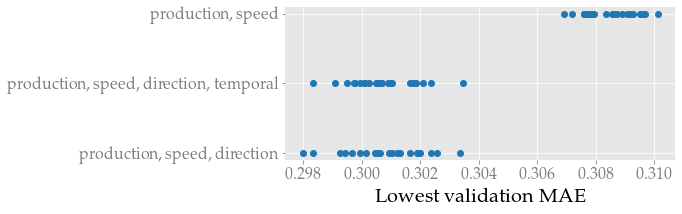

In [110]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    lstmdf.sort_values(by=['lowest_valid_mae'])['lowest_valid_mae'],
    lstmdf.sort_values(by=['lowest_valid_mae'])['features'],
)
#plt.xticks(rotation=90)
plt.yticks([0,1,2], ['production, speed, direction',
                     'production, speed, direction, temporal',
                     'production, speed'])
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('feature_comp_lstm.png')
plt.show()

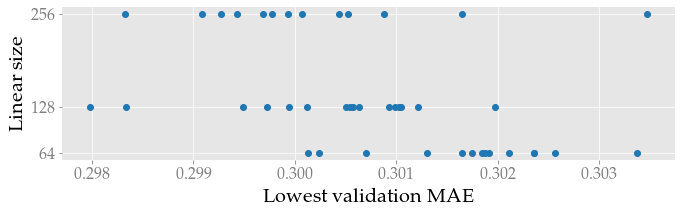

In [154]:
plt.figure(figsize=(10,3.5))
tmpdf = lstmdf[lstmdf['features']!="['production', 'speed']"]
#lstmdf[lstmdf['features']!="['production', 'speed']"]
plt.scatter(
    tmpdf['lowest_valid_mae'],
    tmpdf['linear_size']
)
plt.yticks([64,128,256],[64,128,256])
plt.ylabel('Linear size')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('linear_size_comp_lstm.png')
plt.show()

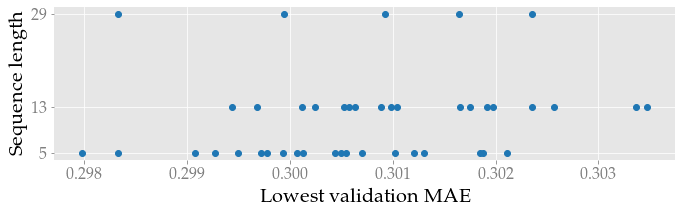

In [153]:
plt.figure(figsize=(10,3.5))
newtmpdf = tmpdf[tmpdf['linear_size']!=64]
'''plt.scatter(
    tmpdf[tmpdf['linear_size']!=64]['lowest_valid_mae'],
    tmpdf[tmpdf['linear_size']!=64]['sequence_length']
)'''
plt.scatter(
    tmpdf['lowest_valid_mae'],
    tmpdf['sequence_length']
)
plt.yticks([5,13,29],[5,13,29])
plt.ylabel('Sequence length')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('sequence_length_comp_lstm.png')
plt.show()

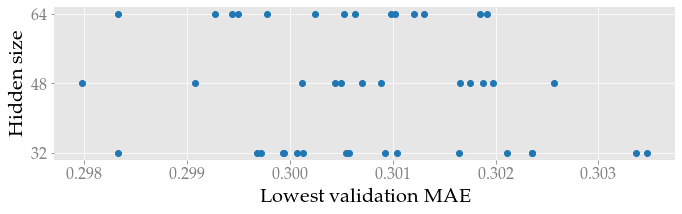

In [152]:
plt.figure(figsize=(10,3.5))
'''plt.scatter(
    newtmpdf[newtmpdf['sequence_length']!=13]['lowest_valid_mae'],
    newtmpdf[newtmpdf['sequence_length']!=13]['hidden_size']
)'''
plt.scatter(
    tmpdf['lowest_valid_mae'],
    tmpdf['hidden_size']
)
plt.yticks([32,48,64],[32,48,64])
plt.ylabel('Hidden size')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('hidden_size_comp_lstm.png')
plt.show()

In [157]:
lstmdf.sort_values(by='lowest_valid_mae')

,lowest_valid_mae,features,params_in_network,trainable_params_in_network,linear_size,hidden_size,sequence_length
35,0.297979,"['production', 'speed', 'direction']",19205,19205,128,48,5
64,0.298326,"['production', 'speed', 'direction', 'temporal']",18437,18437,256,32,29
30,0.298331,"['production', 'speed', 'direction']",28805,28805,128,64,5
47,0.299079,"['production', 'speed', 'direction', 'temporal']",28037,28037,256,48,5
48,0.299267,"['production', 'speed', 'direction']",39685,39685,256,64,5
33,0.299431,"['production', 'speed', 'direction']",39685,39685,256,64,13
20,0.299492,"['production', 'speed', 'direction', 'temporal']",28805,28805,128,64,5
43,0.299681,"['production', 'speed', 'direction']",18437,18437,256,32,13
34,0.299721,"['production', 'speed', 'direction', 'temporal']",11653,11653,128,32,5
42,0.299776,"['production', 'speed', 'direction', 'temporal']",39685,39685,256,64,5


In [185]:
weight_decays = [1e-6, 1e-5, 1e-4, 1e-3]
valid_maes = [0.297745943069458, 0.29865169525146484, 0.2998643219470978, 0.31438279151916504]

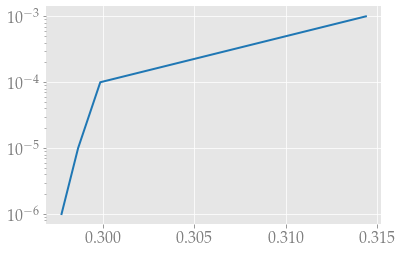

In [186]:
plt.figure(figsize=(10,3.5))
plt.plot(valid_maes, weight_decays)
plt.yscale('log')
plt.show()

## TCN

In [170]:
tcndf = pd.read_csv(f'{tcn_comp_res}/tcn_comparison.csv')
tcndf = tcndf.drop(columns=['Unnamed: 0'])
tcndf = tcndf[tcndf['features']!="['speed', 'direction']"]
tcndf = tcndf[tcndf['channels']!="[32]"]
#tcndf = lstmdf.iloc[1:]

In [171]:
tcndf

,lowest_valid_mae,features,params_in_network,trainable_params_in_network,channels,kernel_size,dropout,sequence_length
0,0.307906,"['production', 'speed', 'direction']",18433,18433,"[32, 32, 32]",3,0.2,29
2,0.306560,"['production', 'speed', 'direction']",18433,18433,"[32, 32, 32]",3,0.3,29
3,0.315527,"['production', 'speed', 'direction', 'temporal']",23681,23681,"[32, 32, 32]",4,0.1,43
4,0.311314,"['production', 'speed', 'direction', 'temporal']",23681,23681,"[32, 32, 32]",4,0.4,43
5,0.300150,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.3,13
6,0.310130,"['production', 'speed', 'direction', 'temporal']",14305,14305,"[32, 32]",4,0.2,19
8,0.312116,"['production', 'speed', 'direction', 'temporal']",25761,25761,"[32, 32, 32, 32]",3,0.1,61
9,0.309548,"['production', 'speed', 'direction']",25761,25761,"[32, 32, 32, 32]",3,0.5,61
10,0.307895,"['production', 'speed', 'direction']",18433,18433,"[32, 32, 32]",3,0.2,29
11,0.309510,"['production', 'speed', 'direction', 'temporal']",18433,18433,"[32, 32, 32]",3,0.1,29


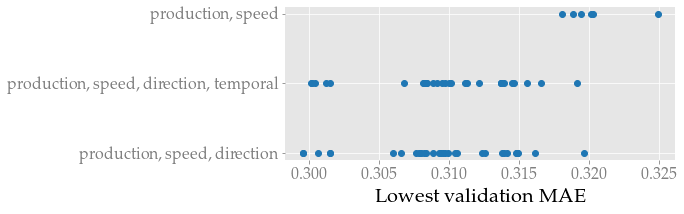

In [172]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    tcndf['lowest_valid_mae'],
    tcndf['features'],
)
#plt.xticks(rotation=90)
plt.yticks([2,1,0], ['production, speed',
                     'production, speed, direction, temporal',
                     'production, speed, direction',
                     ])
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('feature_comp_tcn.png')
plt.show()

In [175]:
newdf = tcndf[tcndf['features']!="['production', 'speed']"]

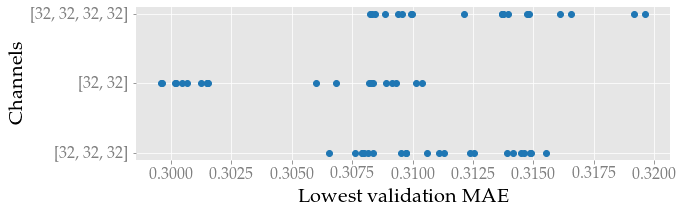

In [176]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    newdf['lowest_valid_mae'],
    newdf['channels']
)
plt.ylabel('Channels')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('channels_comp_tcn.png')
plt.show()

In [178]:
newdf2 = newdf2[newdf2['channels']!="[32, 32, 32, 32]"]
newdf2 = newdf2[newdf2['channels']!="[32, 32, 32]"]

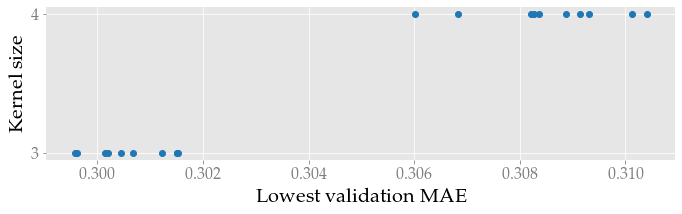

In [180]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    newdf2['lowest_valid_mae'],
    newdf2['kernel_size']
)
plt.yticks([3.0,4.0], [3,4])
plt.ylabel('Kernel size')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('kernel_size_comp_tcn.png')
plt.show()

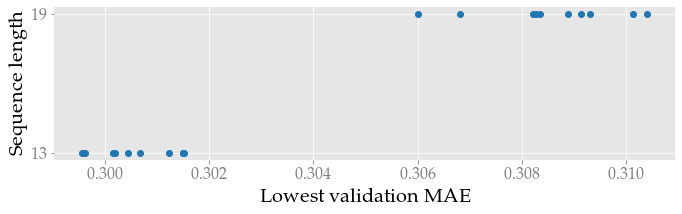

In [182]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    newdf2['lowest_valid_mae'],
    newdf2['sequence_length']
)
plt.yticks([13,19], [13,19])
plt.ylabel('Sequence length')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('sequence_length_comp_tcn.png')
plt.show()

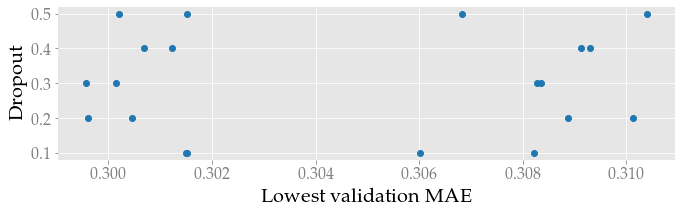

In [183]:
plt.figure(figsize=(10,3.5))
plt.scatter(
    newdf2['lowest_valid_mae'],
    newdf2['dropout']
)
plt.yticks([0.1,0.2,0.3,0.4,0.5], [0.1,0.2,0.3,0.4,0.5])
plt.ylabel('Dropout')
plt.xlabel('Lowest validation MAE')
plt.tight_layout()
plt.savefig('dropout_comp_tcn.png')
plt.show()

In [132]:
tcndf.sort_values(by='lowest_valid_mae')

,lowest_valid_mae,features,params_in_network,trainable_params_in_network,channels,kernel_size,dropout,sequence_length
15,0.299570,"['production', 'speed', 'direction']",11105,11105,"[32, 32]",3,0.3,13
74,0.299615,"['production', 'speed', 'direction']",11105,11105,"[32, 32]",3,0.2,13
5,0.300150,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.3,13
45,0.300207,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.5,13
64,0.300447,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.2,13
35,0.300681,"['production', 'speed', 'direction']",11105,11105,"[32, 32]",3,0.4,13
25,0.301228,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.4,13
54,0.301506,"['production', 'speed', 'direction']",11105,11105,"[32, 32]",3,0.1,13
44,0.301509,"['production', 'speed', 'direction', 'temporal']",11105,11105,"[32, 32]",3,0.1,13
55,0.301528,"['production', 'speed', 'direction']",11105,11105,"[32, 32]",3,0.5,13
